In [74]:
import pandas as pd
import math 
import dataframe_image as dfi
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn import tree

Dataset:

In [75]:
d = {'category': ['hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'jazz', 'jazz', 'jazz'], 
     'track':    ['h1', 'h2', 'h3', 'h4', 'h5', 'j1', 'j2', 'j3'],
     'feature_danceability' : [0.949, 0.743, 0.913, 0.810, 0.434, 0.654, 0.593, 0.234],
     'feature_acousticness' : [0.132, 0.234, 0.394, 0.504, 0.198, 0.534, 0.312, 0.341],
     'label'                : [1, 1, 1, 1, 1, 0, 0, 0]}
df = pd.DataFrame(data=d)

df

,category,track,feature_danceability,feature_acousticness,label
0,hiphop,h1,0.949,0.132,1
1,hiphop,h2,0.743,0.234,1
2,hiphop,h3,0.913,0.394,1
3,hiphop,h4,0.810,0.504,1
4,hiphop,h5,0.434,0.198,1
5,jazz,j1,0.654,0.534,0
6,jazz,j2,0.593,0.312,0
7,jazz,j3,0.234,0.341,0


Initial Prediction:

In [76]:
hiphop  = 0
jazz    = 0

for i, row in enumerate(df.values):
    # hiphop
    if row[4] == 1: 
        hiphop  = hiphop + 1
    # jazz
    else:
        jazz    = jazz + 1 

# calculate initial predictions

f0x = math.log(hiphop/jazz)

f0x

0.5108256237659907

In [77]:
# append initial prediction to dataset (equal for every sample)
f0x_array = []

for i, row in enumerate(df.values):
    f0x_array.append (f0x)

df['f0x'] = f0x_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x
0,hiphop,h1,0.949,0.132,1,0.510826
1,hiphop,h2,0.743,0.234,1,0.510826
2,hiphop,h3,0.913,0.394,1,0.510826
3,hiphop,h4,0.810,0.504,1,0.510826
4,hiphop,h5,0.434,0.198,1,0.510826
5,jazz,j1,0.654,0.534,0,0.510826
6,jazz,j2,0.593,0.312,0,0.510826
7,jazz,j3,0.234,0.341,0,0.510826


Iterative Process: 

First Iteration: 

In [ ]:
# calculate probabilites
prob_array = []
e = 2.718

for i, row in enumerate(df.values):
    prob = math.pow(e, row[5]) / (1 + math.pow(e, row[5]))
    prob_array.append(prob)

df['probability_f0x'] = prob_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988
5,jazz,j1,0.654,0.534,0,0.510826,0.624988
6,jazz,j2,0.593,0.312,0,0.510826,0.624988
7,jazz,j3,0.234,0.341,0,0.510826,0.624988


In [ ]:
# calculate pseudo residuals
residual_array = []

for i, row in enumerate(df.values):
    residual = row[4] - row[6]
    residual_array.append(residual)

df['pseudo_residuals_1'] = residual_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988


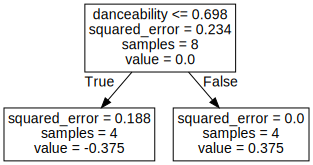

In [ ]:
# build regression tree

# input values
features = ['feature_danceability']
Y = df['pseudo_residuals_1']
X = df[features]

# build tree
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(X, Y)

# display
dot_data = tree.export_graphviz(
    dt,
    feature_names = ['danceability']
    )
graph = graphviz.Source(dot_data)

graph

In [ ]:
# calculate output values 

sum_pr   = 0   
sum_prob = 0

# leafs
left = df.loc[df['feature_danceability'] < 0.698]
right = df.loc[df['feature_danceability'] > 0.698]

# left leaf
for i, row in enumerate(left.values):
    sum_pr   = sum_pr + row[7]
    sum_prob = sum_prob + (row[6] * (1 - row[6]))

ov_left = sum_pr / sum_prob

sum_pr   = 0
sum_prob = 0

for i, row in enumerate(right.values):
    sum_pr   = sum_pr + row[7]
    sum_prob = sum_prob + (row[6] * (1 - row[6]))

ov_right = sum_pr / sum_prob

# fill table
ov_array = []

for i, row in enumerate(df.values):
    if row[2] < 0.698:
        ov = ov_left
    else:
        ov = ov_right
    ov_array.append(ov)

print(ov_left)
print(ov_right)

df['output_value_1'] = ov_array

df

-1.599925851127446
1.6000317795910484


,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926


In [ ]:
# new predictions
learning_rate = 0.6

f1x_array = []

for i, row in enumerate(df.values):
    f1x = row[5] + (learning_rate * row[8])
    f1x_array.append(f1x)

df['f1x'] = f1x_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1,f1x
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032,1.470845
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032,1.470845
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032,1.470845
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032,1.470845
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926,-0.449130
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130


Second Iteration: 

In [ ]:
# calculate probabilites
prob_array = []

for i, row in enumerate(df.values):
    prob = math.pow(e, row[9]) / (1 + math.pow(e, row[9]))
    prob_array.append(prob)

df['probability_f1x'] = prob_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1,f1x,probability_f1x
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926,-0.449130,0.389579
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579


In [ ]:
# calculate pseudo residuals
residual_array = []

for i, row in enumerate(df.values):
    residual = row[4] - row[10]
    residual_array.append(residual)

df['pseudo_residuals_2'] = residual_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1,f1x,probability_f1x,pseudo_residuals_2
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926,-0.449130,0.389579,0.610421
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579


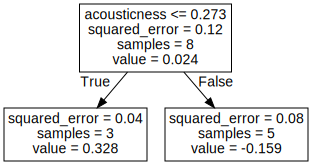

In [ ]:
# build regression tree

# input values
features = ['feature_acousticness']
Y = df['pseudo_residuals_2']
X = df[features]

# build tree
dt2 = DecisionTreeRegressor(max_depth = 1)
dt2.fit(X, Y)

# display
dot_data = tree.export_graphviz(
    dt2,
    feature_names = ['acousticness']
    )
graph = graphviz.Source(dot_data)

graph

In [ ]:
# calculate output values 

sum_pr   = 0   
sum_prob = 0

# leafs
left = df.loc[df['feature_acousticness'] < 0.273]
right = df.loc[df['feature_acousticness'] > 0.273]

# left leaf
for i, row in enumerate(left.values):
    sum_pr   = sum_pr + row[11]
    sum_prob = sum_prob + (row[10] * (1 - row[10]))

ov_left = sum_pr / sum_prob

sum_pr   = 0
sum_prob = 0

for i, row in enumerate(right.values):
    sum_pr   = sum_pr + row[11]
    sum_prob = sum_prob + (row[10] * (1 - row[10]))

ov_right = sum_pr / sum_prob

# fill table
ov_array = []

for i, row in enumerate(df.values):
    if row[3] < 0.273:
        ov = ov_left
    else:
        ov = ov_right
    ov_array.append(ov)

print(ov_left)
print(ov_right)

df['output_value_2'] = ov_array

df

1.8167965745108998
-0.7815561900329465


,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1,f1x,probability_f1x,pseudo_residuals_2,output_value_2
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,1.816797
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,1.816797
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,-0.781556
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,-0.781556
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926,-0.449130,0.389579,0.610421,1.816797
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556


In [ ]:
# new predictions
f2x_array = []

for i, row in enumerate(df.values):
    f2x = row[9] + (learning_rate * row[12])
    f2x_array.append(f2x)

df['f2x'] = f2x_array

df

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1,f1x,probability_f1x,pseudo_residuals_2,output_value_2,f2x
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,1.816797,2.560923
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,1.816797,2.560923
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,-0.781556,1.001911
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,-0.781556,1.001911
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926,-0.449130,0.389579,0.610421,1.816797,0.640948
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556,-0.918064
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556,-0.918064
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556,-0.918064


Final Calculation Predictions for samples

In [ ]:
# calculate probabilites
prob_array = []

for i, row in enumerate(df.values):
    prob = math.pow(e, row[13]) / (1 + math.pow(e, row[13]))
    prob_array.append(prob)

prob_array

df['Final Classification Probability'] = prob_array

df

# probability that song belongs to category hiphop

,category,track,feature_danceability,feature_acousticness,label,f0x,probability_f0x,pseudo_residuals_1,output_value_1,f1x,probability_f1x,pseudo_residuals_2,output_value_2,f2x,Final Classification Probability
0,hiphop,h1,0.949,0.132,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,1.816797,2.560923,0.928286
1,hiphop,h2,0.743,0.234,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,1.816797,2.560923,0.928286
2,hiphop,h3,0.913,0.394,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,-0.781556,1.001911,0.731414
3,hiphop,h4,0.810,0.504,1,0.510826,0.624988,0.375012,1.600032,1.470845,0.813163,0.186837,-0.781556,1.001911,0.731414
4,hiphop,h5,0.434,0.198,1,0.510826,0.624988,0.375012,-1.599926,-0.449130,0.389579,0.610421,1.816797,0.640948,0.654953
5,jazz,j1,0.654,0.534,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556,-0.918064,0.285372
6,jazz,j2,0.593,0.312,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556,-0.918064,0.285372
7,jazz,j3,0.234,0.341,0,0.510826,0.624988,-0.624988,-1.599926,-0.449130,0.389579,-0.389579,-0.781556,-0.918064,0.285372
